In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

import numpy as np
import pandas as pd
import warnings

with warnings.catch_warnings():  
    warnings.filterwarnings("ignore",category=FutureWarning)
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras.preprocessing.text import Tokenizer
    print('Supressed Warnings..')

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

FAST_RUN = True
IMAGE_WIDTH=50
IMAGE_HEIGHT=50
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

/home/karan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/karan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/karan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/karan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

Supressed Warnings..


In [2]:
filenames = os.listdir("./background/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'next':
        categories.append(1)
    elif category == 'prev':
        categories.append(2)
    elif category == 'pause':
        categories.append(3)
    elif category == 'others':
        categories.append(4)
#     print(filename)

          filename  category
0    next.1299.png         1
1    next.1145.png         1
2   others.584.png         4
3    pause.544.png         3
4     next.966.png         1
5     prev.401.png         2
6     prev.485.png         2
7   pause.1138.png         3
8   others.591.png         4
9    pause.299.png         3
10  others.437.png         4
11  pause.1328.png         3
12    prev.172.png         2
13     prev.28.png         2
14  others.367.png         4
15    next.242.png         1
16    next.388.png         1
17    next.218.png         1
18    next.432.png         1
19    prev.613.png         2


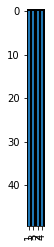

In [3]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
print(df.head(20))
df.tail()
df['category'].value_counts().plot.bar()
sample = random.choice(filenames)
image = load_img("./background/train/"+sample)
plt.imshow(image)


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization


In [5]:
from keras import optimizers
model = Sequential()
# ----------------PHASE 0
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

#-----PHASE 1
model.add(Conv2D(32, (2, 2), input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(4)) 
model.add(Activation('softmax')) 

#-------PHASE 2
# model.add(Conv2D(6, (3, 3), input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))) 
# model.add(Activation('relu')) 
# model.add(MaxPooling2D(pool_size=(2, 2))) 
  
# model.add(Conv2D(32, (2, 2))) 
# model.add(Activation('relu')) 
# model.add(MaxPooling2D(pool_size=(2, 2))) 
  
# model.add(Conv2D(64, (2, 2))) 
# model.add(Activation('relu')) 
# model.add(MaxPooling2D(pool_size=(2, 2))) 
  
# model.add(Flatten()) 
# model.add(Dense(64)) 
# model.add(Activation('relu')) 
# model.add(Dropout(0.5)) 
# model.add(Dense(4)) 
# model.add(Activation('sigmoid')) 

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 49, 49, 32)        416       
_________________________________________________________________
activation_1 (Activation)    (None, 49, 49, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 32)        4128      
_________________________________________________________________
activation_2 (Activation)    (None, 23, 23, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)      

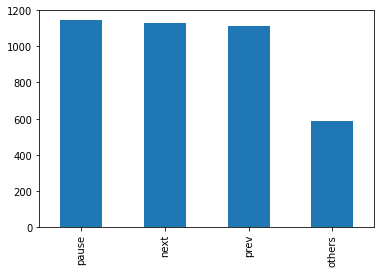

In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]
df["category"] = df["category"].replace({3: 'pause', 1: 'next', 2: 'prev', 4: 'others'})


# 2 - cross validation
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()
validate_df['category'].value_counts().plot.bar()
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=16

In [7]:
import cv2
def prepro(img):
    gray_image = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)
    print(gray_image.shape)
    return gray_image

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=False,
#     vertical_flip=True,
#     preprocessing_function=prepro,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./background/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./background/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
) 

# plt.figure(figsize=(12, 12))
# for i in range(0, 15):
#     plt.subplot(5, 3, i+1)
#     for X_batch, Y_batch in example_generator:
#         image = X_batch[0]
#         plt.imshow(image)
#         break
# plt.tight_layout()
# plt.show()

Found 3976 validated image filenames belonging to 4 classes.
Found 995 validated image filenames belonging to 4 classes.


In [8]:
print(train_df)

            filename category
0      pause.176.png    pause
1      pause.179.png    pause
2     others.147.png   others
3       prev.780.png     prev
4      pause.902.png    pause
...              ...      ...
3971      next.8.png     next
3972  others.573.png   others
3973  others.601.png   others
3974  pause.1225.png    pause
3975    prev.666.png     prev

[3976 rows x 2 columns]


In [9]:
print(validate_df)

           filename category
0      prev.210.png     prev
1    pause.1191.png    pause
2     prev.1159.png     prev
3    pause.1227.png    pause
4     next.1152.png     next
..              ...      ...
990    next.683.png     next
991     prev.71.png     prev
992    prev.303.png     prev
993  others.415.png   others
994  others.230.png   others

[995 rows x 2 columns]


In [10]:
epochs=35 if FAST_RUN else 10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)


Epoch 1/35
248/248 [==============================] - 9s 37ms/step - loss: 1.0599 - accuracy: 0.5000 - val_loss: 0.8102 - val_accuracy: 0.6512
Epoch 2/35
  5/248 [..............................] - ETA: 8s - loss: 0.8916 - accuracy: 0.5750

/home/karan/.local/lib/python3.6/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


248/248 [==============================] - 9s 38ms/step - loss: 0.8380 - accuracy: 0.6131 - val_loss: 0.4329 - val_accuracy: 0.7436
Epoch 3/35
248/248 [==============================] - 9s 37ms/step - loss: 0.7367 - accuracy: 0.6722 - val_loss: 0.4463 - val_accuracy: 0.7640
Epoch 4/35
248/248 [==============================] - 9s 37ms/step - loss: 0.6618 - accuracy: 0.7073 - val_loss: 0.9204 - val_accuracy: 0.8182
Epoch 5/35
248/248 [==============================] - 9s 37ms/step - loss: 0.6277 - accuracy: 0.7227 - val_loss: 0.3504 - val_accuracy: 0.8570
Epoch 6/35
248/248 [==============================] - 9s 37ms/step - loss: 0.5858 - accuracy: 0.7545 - val_loss: 0.6463 - val_accuracy: 0.8631
Epoch 7/35
248/248 [==============================] - 9s 38ms/step - loss: 0.5424 - accuracy: 0.7702 - val_loss: 0.3499 - val_accuracy: 0.9070
Epoch 8/35
248/248 [==============================] - 10s 39ms/step - loss: 0.5101 - accuracy: 0.7924 - val_loss: 0.2410 - val_accuracy: 0.8764
Epoch 9/3

In [11]:
model.save_weights("model_background.h5")

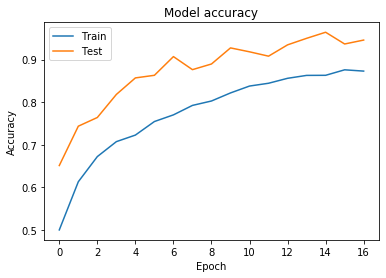

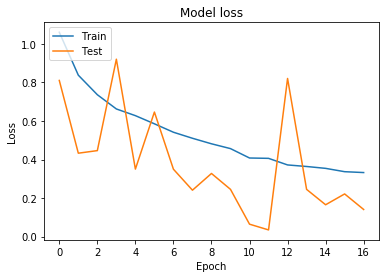

In [12]:
# visualize training
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
# ax1.plot(history.history['loss'], color='b', label="Training loss")
# ax1.plot(history.history['val_loss'], color='r', label="validation loss")
# ax1.set_xticks(np.arange(1, epochs, 1))
# ax1.set_yticks(np.arange(0, 1, 0.1))

# ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
# ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
# ax2.set_xticks(np.arange(1, epochs, 1))

# legend = plt.legend(loc='best', shadow=True)
# plt.tight_layout()
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Found 662 validated image filenames.
(662, 1)
(662, 4)
------------------Testing Data---------------------
          filename category
644    next.93.png     next
645    prev.74.png     prev
646    next.31.png     next
647   prev.200.png     prev
648   prev.149.png     prev
649    next.27.png     prev
650    prev.38.png     prev
651  pause.120.png    pause
652   prev.112.png     prev
653    prev.55.png     prev
654  pause.103.png    pause
655   next.135.png    pause
656    pause.6.png    pause
657   prev.127.png     next
658  pause.166.png     prev
659    prev.19.png     prev
660  pause.141.png     next
661    next.26.png     prev


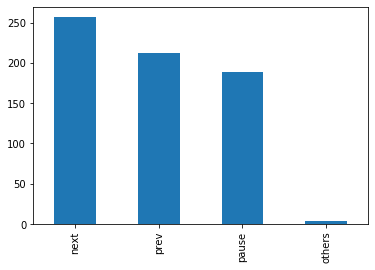

In [13]:
test_filenames = os.listdir('./background/test1')
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./background/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
print(test_df.shape)
print(predict.shape)
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
# test_df['category'] = test_df['category'].replace({ 'next': 1, 'pause': 0 })
test_df['category'].value_counts().plot.bar()

sample_test = test_df.tail(18)
print('------------------Testing Data---------------------')
print(sample_test)

In [14]:
import json

model_json = model.to_json()
with open("model_in_json_back.json", "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights("model_weights_back.h5")

In [15]:
print(predict[1])
# print(test_df.at(3))

[8.2880251e-06 3.9273075e-08 1.5105519e-03 9.9848109e-01]
